# K Means Clustering Project

### Usually when dealing with an unsupervised learning problem, its difficult to get a good measure of how well the model performed. For this project, we will use data from the UCI archive based off of red and white wines (this is a very commonly used data set in ML).
### We will then add a label to the a combined data set, we'll bring this label back later to see how well we can cluster the wine into groups.

In [32]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

C:\Users\rohit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Get the Data

In [2]:
#Using read.csv to open both data sets and set them as df1 and df2
df1 = pd.read_csv('winequality-red.csv',sep=";")
df2 = pd.read_csv('winequality-white.csv',sep=";")

In [3]:
#Adding a label column to both df1 and df2 indicating a label 'red' or 'white'
df1['label'] = 'red'
df2['label'] = 'white'

In [4]:
#Combining df1 and df2 into a single data frame called wine
wine = pd.concat([df1,df2])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
label                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


# EDA

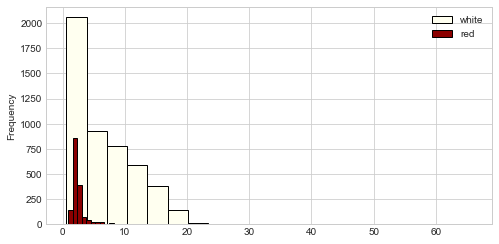

In [5]:
#Creating a Histogram of residual sugar from the wine data
plt.figure(figsize=(8,4))
wine[wine['label']=='white']['residual sugar'].plot.hist(bins=20,color="ivory",edgecolor="black",label="white")
wine[wine['label']=='red']['residual sugar'].plot.hist(bins=20,color="darkred",edgecolor="black",label="red")
plt.legend()

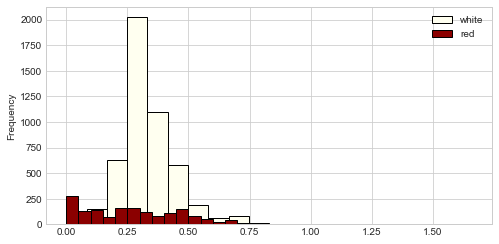

In [6]:
#Creating a Histogram of citric acid from the wine data
plt.figure(figsize=(8,4))
wine[wine['label']=='white']['citric acid'].plot.hist(bins=20,color="ivory",edgecolor="black",label="white")
wine[wine['label']=='red']['citric acid'].plot.hist(bins=20,color="darkred",edgecolor="black",label="red")
plt.legend()

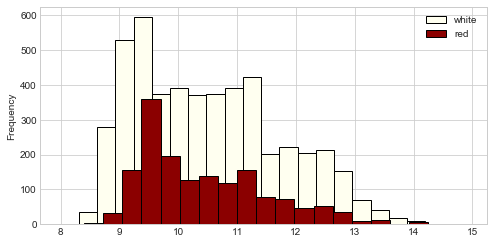

In [7]:
#Creating a Histogram of alcohol from the wine data
plt.figure(figsize=(8,4))
wine[wine['label']=='white']['alcohol'].plot.hist(bins=20,color="ivory",edgecolor="black",label="white")
wine[wine['label']=='red']['alcohol'].plot.hist(bins=20,color="darkred",edgecolor="black",label="red")
plt.legend()

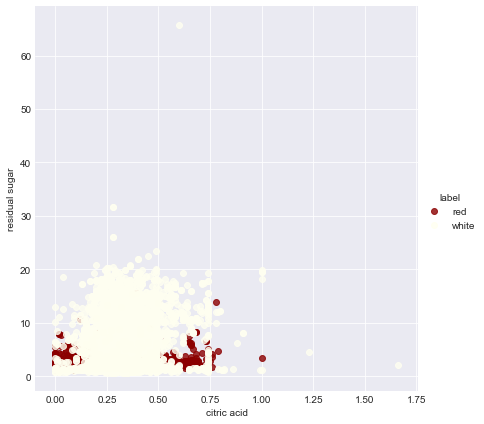

In [8]:
#Creating a scatterplot of residual.sugar versus citric.acid, color by red and white wine.
plt.style.use('seaborn-darkgrid')
sns.lmplot(y='residual sugar',x='citric acid',data=wine, hue='label',palette=('darkred','ivory'),size=6,aspect=1,fit_reg=False)

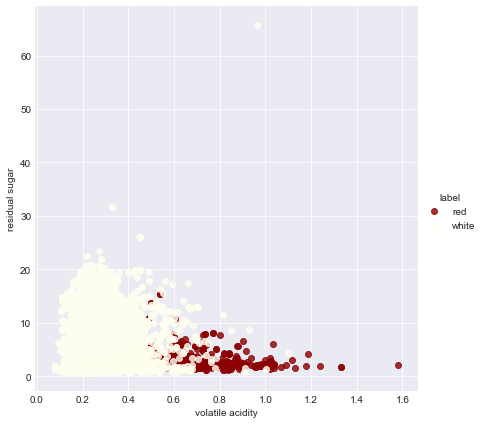

In [9]:
#Creating a scatterplot of volatile.acidity versus residual.sugar, color by red and white wine
plt.style.use('seaborn-darkgrid')
sns.lmplot(y='residual sugar',x='volatile acidity',data=wine, hue='label',palette=('darkred','ivory'),size=6,aspect=1,fit_reg=False)

# Building the Clusters

In [10]:
#Creating an instance of a K Means model with 2 clusters
kmeans = KMeans(n_clusters=2)

#Fit the model to all the data except for the label column
x = wine.drop('label',axis=1)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
#Printing out the wine.cluster Cluster Means and explore the information
kmeans.cluster_centers_

array([[  6.90514184e+00,   2.87101746e-01,   3.39672668e-01,
          7.26603928e+00,   4.86036552e-02,   3.98419258e+01,
          1.55976405e+02,   9.94799771e-01,   3.19017185e+00,
          5.00000000e-01,   1.02568322e+01,   5.82487725e+00],
       [  7.61695514e+00,   4.07734016e-01,   2.91388202e-01,
          3.08279760e+00,   6.56555987e-02,   1.84607912e+01,
          6.36464147e+01,   9.94563077e-01,   3.25518545e+00,
          5.71759096e-01,   1.07960732e+01,   5.80996114e+00]])

# Evaluating the Clusters

In [38]:
#Creating a confusion matrix and classification report to see how well the Kmeans clustering worked
#Please note that this is an un-supervised algo and labels will not be available
temp =  pd.DataFrame(kmeans.labels_)
label = pd.DataFrame(wine['label'])
wine_cluster = label.join(temp)
wine_cluster.rename(columns={'label': 'actual', 0: 'predicted'}, inplace=True)
wine_cluster.head()

,actual,predicted
0,red,1
0,white,1
1,red,1
1,white,1
2,red,1


In [41]:
wine_cluster = sm.add_constant(wine_cluster).copy()
cf = wine_cluster.pivot_table(values=['const'], index=['actual'], columns=['predicted'], aggfunc='count')
cf

const      
predicted     0     1
actual               
red          83  1516
white      2581  2317